In [1]:
!pip install tensorflow

   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ------ --------------------------------- 2.6/15.8 MB 16.7 MB/s eta 0:00:01
   -------------- ------------------------- 5.8/15.8 MB 16.8 MB/s eta 0:00:01
   ----------------------- ---------------- 9.4/15.8 MB 16.3 MB/s eta 0:00:01
   --------------------------------- ------ 13.1/15.8 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------  15.7/15.8 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 15.8/15.8 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
feast 0.37.1 requires numpy<1.25,>=1.22, but you have numpy 1.26.4 which is incompatible.
feast 0.37.1 requires protobuf<5.0.0,>=4.24.0, but you have protobuf 4.23.4 which is incompatible.
mypy-protobuf 3.6.0 requires protobuf>=4.25.3, but you have protobuf 4.23.4 which is incompatible.
mysql-connector-python 8.1.0 requires protobuf<=4.21.12,>=4.21.1, but you have protobuf 4.23.4 which is incompatible.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

Image Example

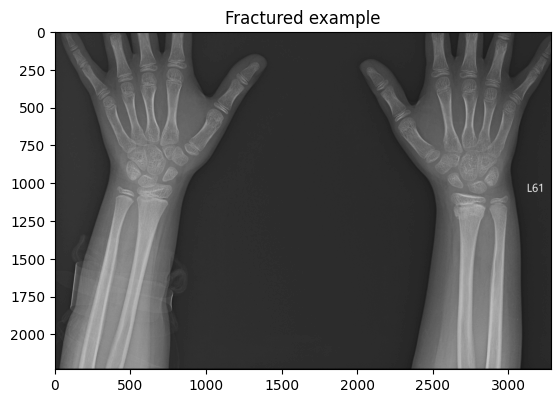

In [10]:
# Percorso alla directory del dataset di training
train_dataset_dir = f'archive/data/train'

# Percorso alla directory del dataset di validation
val_dataset_dir = f'archive/data/val'

# Carica alcune immagini di esempio per visualizzare
sample_image = plt.imread(os.path.join(train_dataset_dir, 'fractured', '10.jpg'))
plt.imshow(sample_image, cmap='gray')
plt.title('Fractured example')
plt.show()

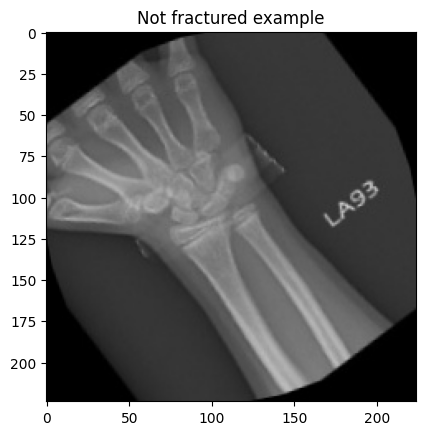

In [11]:
# Carica alcune immagini di esempio per visualizzare
sample_image = plt.imread(os.path.join(train_dataset_dir, 'not fractured', '4-rotated2-rotated3-rotated1.jpg'))
plt.imshow(sample_image, cmap='gray')
plt.title('Not fractured example')
plt.show()

Data preparation

In [12]:
# Imposta il generatore di immagini
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Usa 20% dei dati per la validazione
)

# Generatore per il training
train_generator = datagen.flow_from_directory(
    train_dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Generatore per la validazione
validation_generator = datagen.flow_from_directory(
    val_dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 7091 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


Model

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Classificazione binaria: 1 = fractured, 0 = normal
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


221/221 [==============================] - 138s 609ms/step - loss: 0.5265 - accuracy: 0.7273 - val_loss: 0.7173 - val_accuracy: 0.7292
Epoch 2/20
221/221 [==============================] - 46s 210ms/step - loss: 0.2182 - accuracy: 0.9119 - val_loss: 0.7958 - val_accuracy: 0.6354
Epoch 3/20
221/221 [==============================] - 48s 217ms/step - loss: 0.0999 - accuracy: 0.9622 - val_loss: 1.3323 - val_accuracy: 0.6354
Epoch 4/20
221/221 [==============================] - 48s 217ms/step - loss: 0.0678 - accuracy: 0.9749 - val_loss: 0.7244 - val_accuracy: 0.7396
Epoch 5/20
221/221 [==============================] - 48s 215ms/step - loss: 0.0535 - accuracy: 0.9813 - val_loss: 1.1149 - val_accuracy: 0.6979
Epoch 6/20
221/221 [==============================] - 49s 223ms/step - loss: 0.0379 - accuracy: 0.9860 - val_loss: 1.6837 - val_accuracy: 0.5729
